# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [9]:
# Load Dataset via Pandas
data_path = './data/bikesharing_hour.csv'
rides = pd.read_csv(data_path)

In [10]:
# Let's take a look
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Checking out the data

This dataset has the number of riders for each hour of each day from January 1, 2011 to December 31, 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above, and some summary statistics below (there's 17,379 entries in there!)

In [11]:
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Below is a plot showing the number of bike riders over the first 10 days or so in the data set. (Some days don't have exactly 24 entries in the data set, so it's not exactly 10 days.) You can see the hourly rentals here:

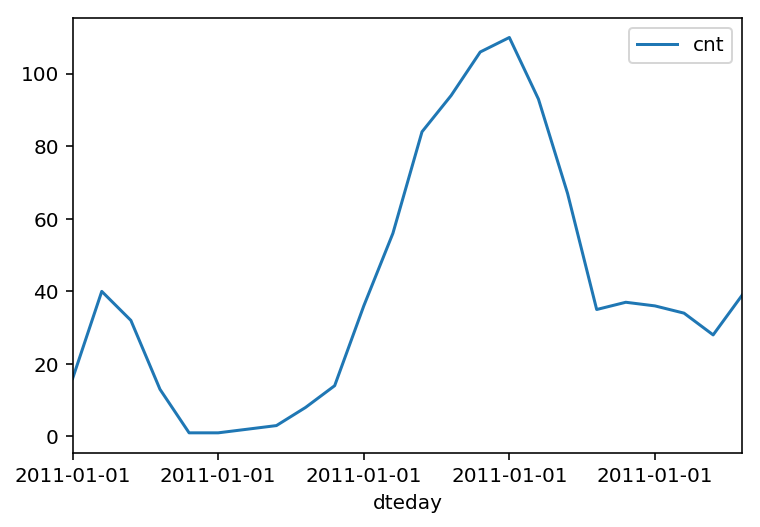

In [12]:
# Plot Count against Day (For 24 Hours)
rides[:24].plot(x='dteday', y='cnt')

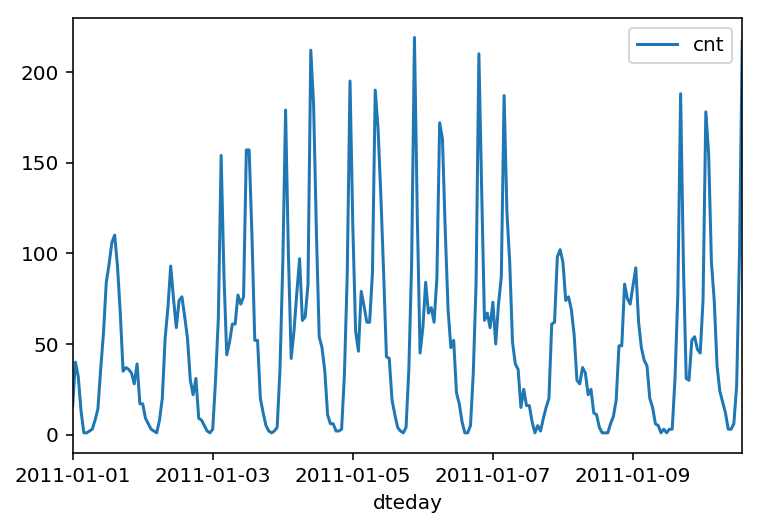

In [13]:
# Plot Count against Day (For 24 Hours over 10 Days = 2400 Hours)
rides[:24*10].plot(x='dteday', y='cnt')

This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. 

You'll be trying to capture all this with your model.

### Dummy variables
Here we have some **categorical variables** like season, weather, month. To include these in our model, we'll need to make them **binary dummy variables.** 

This is simple to do with `Pandas` thanks to `get_dummies()`. To get a handle of how it works, let's see how many unique variables are in the `season` column as an example.

In [14]:
# How many variables? 
rides['season'].unique()

array([1, 2, 3, 4])

Therefore, `season` can take 1 of 4 values (Spring, Summer, Fall, Winter), so to convert these to dummies, we need to create four columns of the form `season_1` which is either a 1 or a 0 depending on whether it is Spring. This is exactly what `get_dummies()` does:

In [15]:
# Get Dummies in action, takes each unique variable 
pd.get_dummies(rides['season'], prefix='season', drop_first=False)

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0



Naturally, every row will therefore have only binary value in these 4 dummy columns, but at least using zeroes makes this a fairly sparse array.

Let's build a loop to iterate through all the categorial variables we have:

In [16]:
# Which fields should we transform?
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

# For each entry in the fields
for each in dummy_fields:
    # Get the dummy version
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    # Merge onto rides 
    rides = pd.concat([rides, dummies], axis=1)

In [17]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1


Alright, that's all done, but we still have the old categorical values in there. Let's get rid of those.

In [18]:
# Drop the old ones
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']

data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling target variables
To generally make training the network much, *much* easier, we'll standardize each of the continuous variables **quantiative** variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1, which should sound fairly familiar:

![](http://d2r5da613aq50s.cloudfront.net/wp-content/uploads/360188.image0.jpg)

Yep, all we are doing is **normalizing** our variables, and scaling them such that they will follow a traditional normal distribution. The standard function for normalizing (also called the standard score or z-score) is:

![](./assets/normal.png)

So lets pipe all of our **quantiative** variables through this normalization process. As an example, let's start with `cnt`:

In [19]:
test = data.loc[:, 'cnt'] # From dataset, get all rows with label `cnt`
test

0         16
1         40
2         32
3         13
4          1
5          1
6          2
7          3
8          8
9         14
10        36
11        56
12        84
13        94
14       106
15       110
16        93
17        67
18        35
19        37
20        36
21        34
22        28
23        39
24        17
25        17
26         9
27         6
28         3
29         2
        ... 
17349    125
17350    102
17351     72
17352     47
17353     36
17354     49
17355     34
17356     19
17357     11
17358      1
17359      3
17360      9
17361     40
17362     85
17363    196
17364    157
17365    120
17366    157
17367    224
17368    203
17369    247
17370    315
17371    214
17372    164
17373    122
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, dtype: int64

In [20]:
mean = test.mean() # Mu
standard_deviation = test.std() # Sigma

In [21]:
test.apply(lambda x: (x - mean)/standard_deviation) # Let's apply the normalization function to the dataset

0       -0.956312
1       -0.823998
2       -0.868103
3       -0.972851
4       -1.039008
5       -1.039008
6       -1.033495
7       -1.027981
8       -1.000416
9       -0.967338
10      -0.846051
11      -0.735789
12      -0.581424
13      -0.526293
14      -0.460137
15      -0.438084
16      -0.531806
17      -0.675146
18      -0.851564
19      -0.840538
20      -0.846051
21      -0.857077
22      -0.890155
23      -0.829511
24      -0.950799
25      -0.950799
26      -0.994903
27      -1.011442
28      -1.027981
29      -1.033495
           ...   
17349   -0.355389
17350   -0.482189
17351   -0.647581
17352   -0.785407
17353   -0.846051
17354   -0.774381
17355   -0.857077
17356   -0.939773
17357   -0.983877
17358   -1.039008
17359   -1.027981
17360   -0.994903
17361   -0.823998
17362   -0.575911
17363    0.036038
17364   -0.178971
17365   -0.382954
17366   -0.178971
17367    0.190404
17368    0.074630
17369    0.317204
17370    0.692092
17371    0.135273
17372   -0.140379
17373   -0

As you can see, it's been transformed for individual integers to a float representing its position on a standard normal distribution. 

Now let's do this for all the quantitative features in our dataset, stored their former mean and standard deviation in a dictionary called `scaled_features`. 

Since the normalization function works by just subtracting the mean and dividing by the standard deviation for each value, we can quickly invert normalization by just doing:

![](./assets/unnormal.png)

So let's keep track of them for later:

In [22]:
# What are all the continous features in this dataset (as opposed to discrete above)
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

# Store scalings in a dictionary so we can convert back later
scaled_features = {}

# For each feature
for each in quant_features:
    mean, std = data[each].mean(), data[each].std() # Grab it's mean and standard deviation (just for the col `each`)
    scaled_features[each] = [mean, std] # Store the original mean and we are scaling by just in case
    data.loc[:, each] = (data[each] - mean)/std # Select all the rows from col `each`, and normalize every one

The scaling factors are saved so we can go backwards when we use the network for predictions after training (!)

### Splitting the data into training, testing, and validation sets

We'll save the data for the last approximately 21 days to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [23]:
# Save data for approximately the last 21 days (-21 for LAST 21) 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered'] # which variables do we wanna know about

# Extract training features and targets, and use this as the primary dataset 
features, targets = data.drop(target_fields, axis=1), data[target_fields]

# Extract the test features and targets the same way; just only for the last 21 days
# Note: Unlike the validation set below, the training is NOT removing the last 21 days, so we're training with it
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields] 

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

Therefore, let's make another quick dataset called validation that makes sure we are forecasting correctly. In general, validation is used to find the best approach, and testing is used to further minimize the error of each approach (as explained [here](https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set).)

In [24]:
# Use everything but the last 60 days as the final training set 
train_features, train_targets = features[:-60*24], targets[:-60*24]

# Hold out the last 60 days or so of the remaining data as a validation set
# Note: Validation because these are days the network has never seen, therefore they can be used
# to check if our network it'd work outside the experiment on data it's never seen before
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Time to build the network

Below you'll build your network. We've built out the structure and the backwards pass. You'll implement the forward pass through the network. You'll also set the hyperparameters: **the learning rate, the number of hidden units, and the number of training passes.**

<img src="assets/neural_network.png" width=300px>

### Layers & Activation Functions
The network has two layers, a hidden layer and an output layer. A **layer** is a series of "neurons" at the same level with a given activation function; they can be hidden, input, output, etc. so long as they have the same activation function. An **activation function** is a function that takes the input signal and generates an output signal, but takes into account the threshold (i.e. only fires within certain conditions); here we will be using the venerable [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). The output layer has only one node and is used for the regression, and the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. 


### Forward Propogation & Backward Propogation
We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

![](https://lh3.googleusercontent.com/proxy/KEylW2oPMQGONIVnFvROm9Qn_XReGdYT33KX8Zl9rFY37v-Y1ansWLeZbYR2G8KsYvME30d8c215fdhzn0ClqZF4QxQWSLf8ekVQX8sO2prQ6QoIeguz=w465-h317-nc)

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use these weights to also propagate error backwards from the output back into the network to update our weights, and decide how much each neurons signal should be weighted.  This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

# TODO:

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.

In [71]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights for input > hidden and hidden > output layers, and grab the learning rate
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes)) # Root of 1/input_nodes as sd? Why? 

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        self.bias_input_to_hidden = np.ones(self.input_nodes)
        self.bias_hidden_to_output = np.ones(self.hidden_nodes)
        
        ## Activation Function
        # First we set self.activation_function to our implemented sigmoid function 
        # We also set the derivative of this function, which we will use later as part of gradient descent
        self.activation_function = lambda x : 1/(1 + math.e**-x)  
        self.sigmoid_derivative = lambda x:x*(1 - x)

                    
    
    def train(self, features, targets):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        '''
        
        ## Defaults
        # Start with a count of the dataset and empty weights for the delta weight holder
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        
        for x, y in zip(features, targets):
            #### Implement the forward pass here ####
            
            ### Forward pass ###
                        
            ## Hiden Layer
            # We take the weight vector and input vector, and get the dot product (matrix multiplication)
            # Since the weights are initially random, each node is now randomly-weighted array for every input
            # To get the outputs, we just run the activation function on these new nodes and see if they pass
            hidden_inputs = np.dot(x, self.weights_input_to_hidden) 
            hidden_outputs = self.activation_function(hidden_inputs) 
            
            ## Output layer
            # Again, we are taking the random initial weight and multiplying it by a vector, so do products
            # However, each node is now like a randomly weighted average of a randomly weighted average of inputs 
            # Since the output layer has no activation function, we will just pass 
            final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
            final_outputs = final_inputs # signals from final output layer
            
            #### Implement the backward pass here ####
            ### Backward pass ###
            
            ## Output Errors
            # This output errors variable measures the difference between desired targets and our actual output
            output_error = y - final_outputs
                        
            # The hidden error represents errors between the hidden layers, which can get a little messy
            # First, lets get the dot product of these two vectors again
            hidden_error = np.dot(self.weights_hidden_to_output, output_error) 
            
            # Weight Updating
            # Now that we have the vectors, how do we translate our error such that we can modify 
            # the weights to reduce it. First though, we need to reverse our activation function to get weights
            # so we do the derivative of the activation function (here the Sigmoid)
            output_error_term = output_error
            hidden_error_term = hidden_error * self.sigmoid_derivative(hidden_outputs)
            
            # Weight step (input to hidden)
            # To get this, we take the learning rate and multiply it by the dot product of the 

            
            # Apparently transposing a 1D array in Numpy doesn't work, but we can reshape with a new (empty) axis
            # Also it's element-wise multiplication now, not dot products 
            delta_weights_i_h += self.lr * hidden_error_term * x[:,None] 
            # Weight step (hidden to output)
            # Same idea, but since the final layer is just input to output, don't need a derivative
            delta_weights_h_o += self.lr * output_error_term * hidden_outputs[:,None] 

        ## Final Weights
        # These weights exist outside the loop above, which means they are adjusted for each tuple (x,y) in the
        # training dataset provided. The longer the set, the more opportunities to adjust the weights on each
        # pass through
        
        # update input-to-hidden weights with gradient descent step
        self.weights_input_to_hidden += delta_weights_i_h / n_records
        # update hidden-to-output weights with gradient descent step
        self.weights_hidden_to_output += delta_weights_h_o / n_records

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        ## Initial Forward Propogation
        # We are initializing the network, so all we are doing is a forward pass the way we defined above
        # Hidden layer
        hidden_inputs = np.dot(features,self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
                
        # Output layer
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs

In [72]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Unit tests

Run these unit tests to check the correctness of your network implementation. This will help you be sure your network was implemented correctly befor you starting trying to train it. These tests must all be successful to pass the project.

In [73]:
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == './data/bikesharing_hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.013s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

## Training the network

Here you'll set the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. If you train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network more efficiently. You'll learn more about SGD later.

### Choose the number of iterations
**This is the number of batches of samples from the training data we'll use to train the network.** The more iterations you use, the better the model will fit the data. However, **if you use too many iterations, then the model with not generalize well to other data, this is called overfitting**. You want to find a number here where the network has a low training loss, and the validation loss is at a minimum. **As you start overfitting, you'll see the training loss continue to decrease while the validation loss starts to increase.**

### Choose the learning rate
**This scales the size of weight updates.** **If this is too big, the weights tend to explode and the network fails to fit the data.** A good choice to start at is 0.1. If the network has problems fitting the data, try reducing the learning rate. **Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.**

### Choose the number of hidden nodes
**The more hidden nodes you have, the more accurate predictions the model will make.** Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. **If the number of hidden units is too low, then the model won't have enough space to learn** and **if it is too high there are too many options for the direction that the learning can take**. The trick here is to find the right balance in number of hidden units you choose.

In [4]:
import sys

### Set the hyperparameters here ###
iterations = 10
learning_rate = 0.15
hidden_nodes = 30
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

# Borrwing this dictionary for plotting!
losses = {'train':[], 
          'validation':[], 
          'iterations':[iterations], 
          'learning_rate':[learning_rate], 
          'hidden_nodes':[hidden_nodes]
         }

for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set we did earlier 
    batch = np.random.choice(train_features.index, size=128)
    # Using those random indices, use pandas.ix() to get the values, and get the targets for the same rows
    # from train_targets, but since we can only use 1 of the 3 targets for the one output node, lets use `cnt`
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
    
    # Train the network by going through each x,y in the feature target list
    # The magic happens because the weights are stored outside the main loop, so we can 
    # iteratively improve the weights using gradient descent through each pass through of this training step
    network.train(X, y)
    
    # Now let's meausre the success of those weights using MSE, and feeding forward the training data and 
    # training targets, and measuring the loss using the current weighted nodes 
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    # Also, let's use that validation set (data it's never seen) to test it's performance in the "wild"
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    
    # Printing out the training progress
    # Updates that dict up there with values, prints to stdout, then flushes and does it all again
    # In that way, yields a cool table and a great little load animation which powers the plot below
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    sys.stdout.flush()
    
    # At the end of the loop, append the dict with latest loss
    # Now iterate again
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

NameError: name 'train_features' is not defined

In [3]:
import sys

### Set the hyperparameters here ###
iterations = 250
learning_rate = 0.15
hidden_nodes = 30
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

# Borrwing this dictionary for plotting!
losses = {'train':[], 
          'validation':[], 
          'iterations':[iterations], 
          'learning_rate':[learning_rate], 
          'hidden_nodes':[hidden_nodes]
         }

for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set we did earlier 
    batch = np.random.choice(train_features.index, size=128)
    # Using those random indices, use pandas.ix() to get the values, and get the targets for the same rows
    # from train_targets, but since we can only use 1 of the 3 targets for the one output node, lets use `cnt`
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
    
    # Train the network by going through each x,y in the feature target list
    # The magic happens because the weights are stored outside the main loop, so we can 
    # iteratively improve the weights using gradient descent through each pass through of this training step
    network.train(X, y)
    
    # Now let's meausre the success of those weights using MSE, and feeding forward the training data and 
    # training targets, and measuring the loss using the current weighted nodes 
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    # Also, let's use that validation set (data it's never seen) to test it's performance in the "wild"
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    
    # Printing out the training progress
    # Updates that dict up there with values, prints to stdout, then flushes and does it all again
    # In that way, yields a cool table and a great little load animation which powers the plot below
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    sys.stdout.flush()
    
    # At the end of the loop, append the dict with latest loss
    # Now iterate again
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

NameError: name 'train_features' is not defined

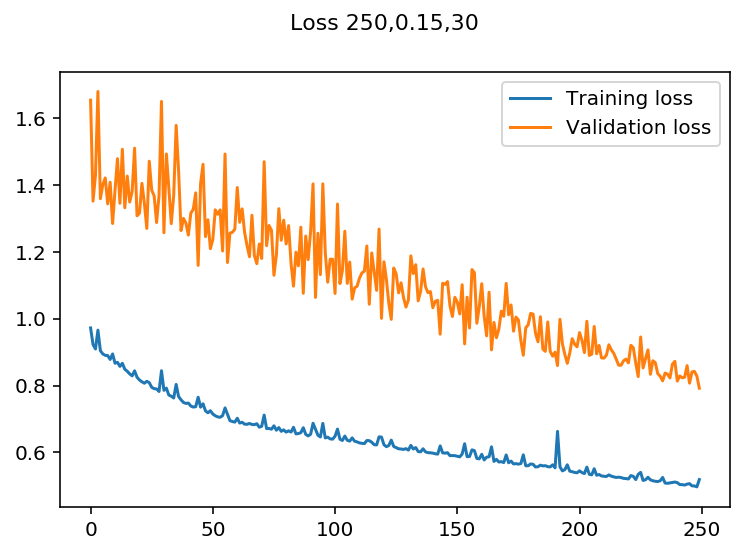

In [32]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

# Let's add a title, and save it somewhere
title = 'Loss ' \
             + '' + str(losses['iterations'][0]) \
             + ',' + str(losses['learning_rate'][0]) \
             + ',' + str(losses['hidden_nodes'][0])
            
plt.suptitle(title, fontsize=11,)
plt.savefig("./figures/" + title + ".png")

In [33]:
losses['validation'][-1]

0.79220210807200098

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

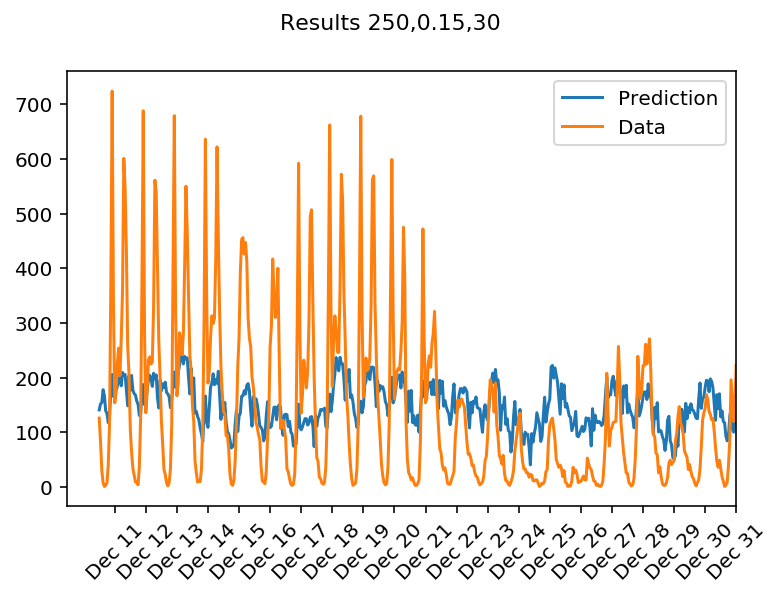

In [107]:
fig, ax = plt.subplots()

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

# Let's add a title, and save it somewhere
second_title = 'Results ' \
             + '' + str(losses['iterations'][0]) \
             + ',' + str(losses['learning_rate'][0]) \
             + ',' + str(losses['hidden_nodes'][0])
            
fig.suptitle(second_title, fontsize=11,)
fig.savefig("./figures/" + second_title + ".png")

## Analysis

### Hyperparameter Tuning

#### Iterations

100 Iterations|500 iterations|1000 Iterations
-|-|-
![](./figures/Loss 100,0.1,24.png)|![](./figures/Loss 500,0.1,24.png)|![](./figures/Loss 1000,0.1,24.png)
![](./figures/Results 100,0.1,24.png)|![](./figures/Results 500,0.1,24.png)|![](./figures/Results 1000,0.1,24.png)

As discussed earlier, increasing the number of iterations does yield an overall reduction in training & validation loss, but too many iterations and validation loss starts to curve upwards again (as you can see on the top right.) Therefore, given this tradeoff between minimal loss, runtime, and validation loss the final parameter chosen was **250**. 


#### Learning Rate

0.01 Learning Rate|0.15 Learning Rate|0.5 Learning Rate
-|-|-
![](./figures/Loss 250,0.01,24.png)|![](./figures/Loss 250,0.15,24.png)|![](./figures/Loss 250,0.5,24.png)
![](./figures/Results 250,0.01,24.png)|![](./figures/Results 250,0.15,24.png)|![](./figures/Results 250,0.5,24.png)

A low learning rate means that the weights we are shifting in the neural net (`self.weights_input_to_hidden` & `self.weights_hidden_to_output`) do not move as much, since `self.lr` is one of the parameters used to calculate `delta_weights_i_h` & `delta_weights_h_o`. I think this a great name, because it really does represent "learning"; how much should we allow new information and data to change our neural nets existing beliefs? 

If it's too high, we become too gullibe, changing our weights significantly with every new piece of information and hugging the testing data so tight it increases validation loss. However, if we are too low we learn nothing, ignoring data and keeping the random weights we initialized. Consequently, the final learning rate used was **0.15**.  


#### Hidden Nodes

10 Nodes|100 Nodes|250 Nodes
-|-|-
![](./figures/Loss 250,0.15,10.png)|![](./figures/Loss 250,0.15,100.png)|![](./figures/Loss 250,0.15,500.png)
![](./figures/Results 250,0.15,10.png)|![](./figures/Results 250,0.15,100.png)|![](./figures/Results 250,0.15,500.png)


Increasing nodes may increase effeciency, but only up to a point; after a certain threshold, we are sacrificing significant computational resources to generate nonsense (far left). Initially, I was going to test 1000 nodes, but that took so much time it nearly crashed my machine. On the other hand, too few and we cannot appropriately reflect the complexity of the data; and our testing and validation loss is too high again. Amusingly enough, this threshold is **much** lower than I expected; with the best loss being reached around **30**.

### Analysis

### How well does the model predict the data? 

Frankly, I'm still not completely impressed with the model. At 250 iterations, a learning rate of 0.15, and 30 hidden nodes, the final training loss was still `0.71109919954875223` and the validation loss was still `1.2181699251630218` which for MSE (where lower is better) means the average squared error for this estimator is still waaaay off from being perfect.

### Where does it fail? 

It fails hardest with regard to the validation set, which implies we are suffering from some variant of overfitting; we are far too dependent on our training data. However, even there the training loss is rather high, which means we aren't even learning from our model well. It is disappointing to submit a model with such subpar results, but at least by building it I can sort of see how the different elements can yield very different results depending on their implementation; there seems to be a lot more to Deep Learning than just building a big ANN and switching it on. 


### Why does it fail?

To be perfectly honest, I'm not 100% sure (though I'm open to any feedback.) After testing all the hyperparameters up there I realized that there must exist some magic combination of these values that could yield lower training and validation error. I figure if we recursively search over the entire hyperparameter space, we might eventually stumble upon it. It'll cost a lot of computational power (and I'm pretty sure there are already some pretty good packages for it), but that's not something I explored for this assignment.

## Feedback

After submitting the project, I recieved some pretty great feedback regarding how to further optimize this model. That process will be detailed below, while the above model/analysis is preserved for posterity.

### Hyperparameter (Re-Tuning)

#### Iterations


![](./figures/feedback2.png)


Evidently, I stopped my analysis much too early to see the real benefits of increased iterations; above is an example of what the loss might look at 3000 epochs (alongside a higher learning rate, which we will cover further below). My current machine cannot effeciently process 3000 epochs, but I will be testing at **2000** epochs and seeing if it yields similar benefits.


#### Learning Rate

A rough heuristic for testing the learning rate involves using the **quotient the quotient of the learning rate / the number of records to see if it generates a value between 0.01 and 0.001** for this network. A (admittedly poor) formalization of this is:

![](./assets/learningrate.png)

Consequently, since `0.15/128 = 0.001`, **0.15** is actually the very bottom limit of effeciency. We will test a suggested L of **0.5**, since `0.5/128=0.004`.


#### Hidden Nodes

Evidently the [number of nodes is fairly open](https://www.quora.com/How-do-I-decide-the-number-of-nodes-in-a-hidden-layer-of-a-neural-network); it was suggested that for this network, **more epochs would be more beneficial to performance than more nodes**, so we will leave the number of hidden nodes in the same range at **35 nodes**. 

#### Data Availability

As an interesting aside, the neural network performs quite well during normal days but **fails during the holiday week around Chrismas because there isn't enough data for the neural network to learn about lower ridership during those days**. The dataset only has two years of data and the network only saw this last week **once**, which makes it a particularly difficult validation problem for it. 

![](./figures/feedback1.png)

Progress: 100.0% ... Training loss: 0.214 ... Validation loss: 0.402

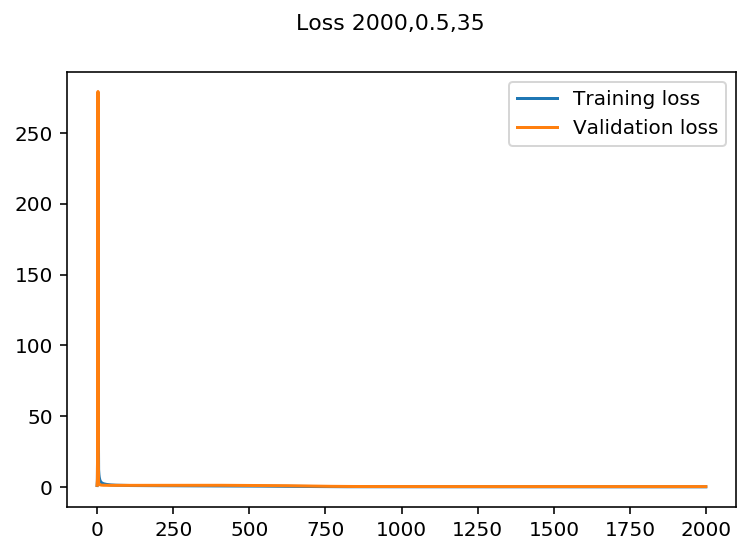

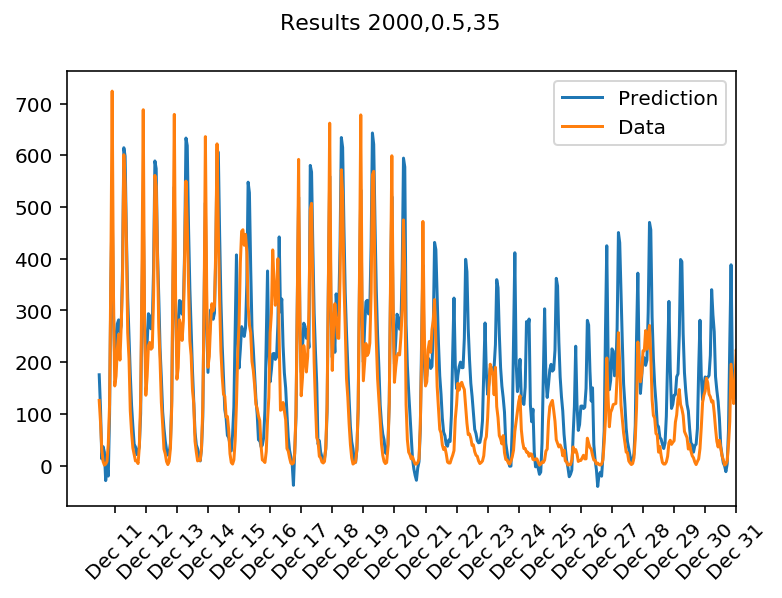

In [35]:
import sys


## Training
### Set the hyperparameters here ###
iterations = 2000
learning_rate = 0.5
hidden_nodes = 35
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

# Borrwing this dictionary for plotting!
losses = {'train':[], 
          'validation':[], 
          'iterations':[iterations], 
          'learning_rate':[learning_rate], 
          'hidden_nodes':[hidden_nodes]
         }

for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set we did earlier 
    batch = np.random.choice(train_features.index, size=128)
    # Using those random indices, use pandas.ix() to get the values, and get the targets for the same rows
    # from train_targets, but since we can only use 1 of the 3 targets for the one output node, lets use `cnt`
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
    
    # Train the network by going through each x,y in the feature target list
    # The magic happens because the weights are stored outside the main loop, so we can 
    # iteratively improve the weights using gradient descent through each pass through of this training step
    network.train(X, y)
    
    # Now let's meausre the success of those weights using MSE, and feeding forward the training data and 
    # training targets, and measuring the loss using the current weighted nodes 
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    # Also, let's use that validation set (data it's never seen) to test it's performance in the "wild"
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    
    # Printing out the training progress
    # Updates that dict up there with values, prints to stdout, then flushes and does it all again
    # In that way, yields a cool table and a great little load animation which powers the plot below
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    sys.stdout.flush()
    
    # At the end of the loop, append the dict with latest loss
    # Now iterate again
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
    

    
## Loss 
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

title = 'Loss ' \
             + '' + str(losses['iterations'][0]) \
             + ',' + str(losses['learning_rate'][0]) \
             + ',' + str(losses['hidden_nodes'][0])
            
plt.suptitle(title, fontsize=11,)
plt.savefig("./figures/" + title + ".png")    

## Validation
fig, ax = plt.subplots()
mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

# Let's add a title, and save it somewhere
second_title = 'Results ' \
             + '' + str(losses['iterations'][0]) \
             + ',' + str(losses['learning_rate'][0]) \
             + ',' + str(losses['hidden_nodes'][0])
            
fig.suptitle(second_title, fontsize=11,)
fig.savefig("./figures/" + second_title + ".png")

These paramaters are implemented above, and they yielded a **much more effecient network** with a training loss of only 0.21414819659326614 (decrease of **69%**) and a validation loss of 0.40253867612225269 (decrease of **40%**). I will strongly consider using **more epohcs and a higher learning rate** for networks in the future.

Thanks Udacity!

## Feedback (Round 2) 

As of now, the final parameters chosen were:

    iterations = 2000
    learning_rate = 0.5
    hidden_nodes = 35
    output_nodes = 1

The training loss is around 0.2, but the more important metric that**tels us how our system will behave with real data (validation loss)**, is much too high at 0.4. As the reviewer pointed out, **a validation loss of 0.5 means that you are not predicting at all or any better that you could do by just chance.**

Their recommendation is:

1. First to choose a moderate number of hidden units (from 8-20). 
2. Try to achieve the red curve ("good learning rate") in the learning rate chart they've provided. 
3. Expand the number of epochs to see what is the validation loss achieved when the curve is stationary/flat. 
4. If it is below 0.2 for the validation loss, then we are done. 
5. If not, try to decrease the learning rate a little bit and see if you can improve the validation loss.

### Hyperparameter (Re-Tuning)

After a submitted again, I recieved yet more incredibly valuable feedback, which I will attempt to parse below:

#### Iterations

The reviewer suggested that the gird comparing the different the different parameters and performance is a viable approach, but a *sub-optimal one*, since we cannot compare different learning rate for the same number or epochs. **The number of epochs depends strongly on the learning rate and the important thing is what is the minimum value of validation loss achieved when the curves reach a constant value.**

#### Learning Rate

Another good way of choosing the learning rate is to keep the quotient of the learning rate / the number of records should end up around 0.01 (i.e. `self.lr / n_records` ~ 0.01). This nturally depends on the structure of the network itself since more complicated networks usually require higher learning rate, but simple networks can apparently yield just as valuable results. 

![](./assets/learningrates.jpg)


#### Hidden Nodes

The network has too many hidden units and may incur in overfitting: it is recommended to decrease the number of hidden units a little bit. A good value is the mean between inputs and output, but [the number of nodes is fairly open](https://www.quora.com/How-do-I-decide-the-number-of-nodes-in-a-hidden-layer-of-a-neural-network); it was suggested that for this network, good performance could be earned from networks anywhere from 5 to 25 hidden nodes, but 35 is far too much.

![](./assets/neuron_model.jpg)

Also, since I did not incorporate a *bias* element into my neural network, making the performance of the nodes marginally poorer than anticipated, but it shouldn't have a significant impact for this toy network.  

Progress: 100.0% ... Training loss: 0.068 ... Validation loss: 0.169

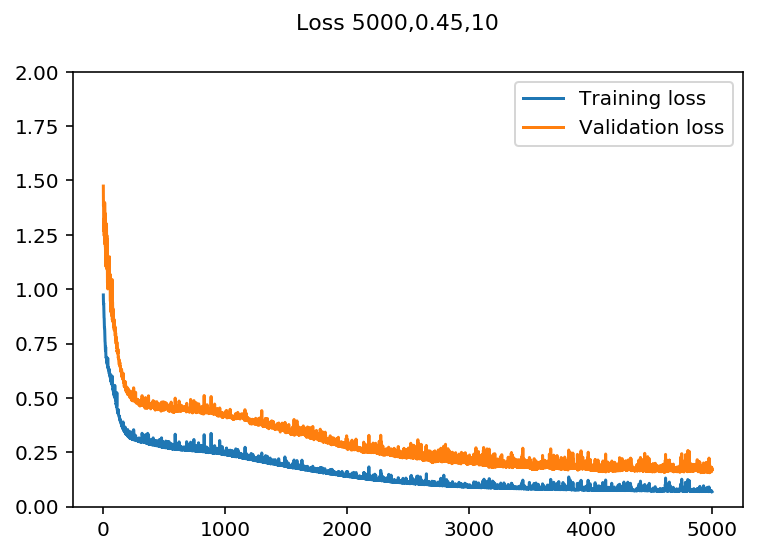

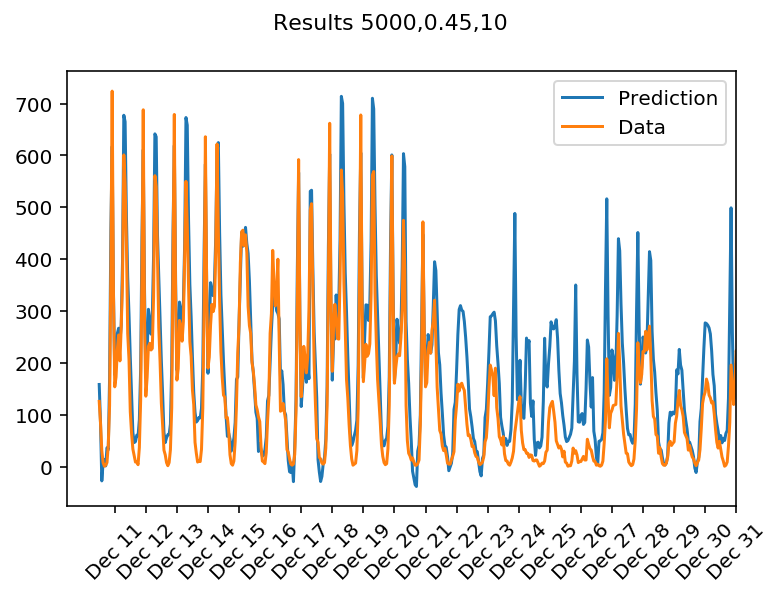

In [93]:
import sys


## Training
### Set the hyperparameters here ###
iterations = 5000
learning_rate = 0.45
hidden_nodes = 10
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

# Borrwing this dictionary for plotting!
losses = {'train':[], 
          'validation':[], 
          'iterations':[iterations], 
          'learning_rate':[learning_rate], 
          'hidden_nodes':[hidden_nodes]
         }

for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set we did earlier 
    batch = np.random.choice(train_features.index, size=128)
    # Using those random indices, use pandas.ix() to get the values, and get the targets for the same rows
    # from train_targets, but since we can only use 1 of the 3 targets for the one output node, lets use `cnt`
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
    
    # Train the network by going through each x,y in the feature target list
    # The magic happens because the weights are stored outside the main loop, so we can 
    # iteratively improve the weights using gradient descent through each pass through of this training step
    network.train(X, y)
    
    # Now let's meausre the success of those weights using MSE, and feeding forward the training data and 
    # training targets, and measuring the loss using the current weighted nodes 
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    # Also, let's use that validation set (data it's never seen) to test it's performance in the "wild"
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    
    # Printing out the training progress
    # Updates that dict up there with values, prints to stdout, then flushes and does it all again
    # In that way, yields a cool table and a great little load animation which powers the plot below
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    sys.stdout.flush()
    
    # At the end of the loop, append the dict with latest loss
    # Now iterate again
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
    

    
## Loss 
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim(0,2) # better axis for the smaller value

title = 'Loss ' \
             + '' + str(losses['iterations'][0]) \
             + ',' + str(losses['learning_rate'][0]) \
             + ',' + str(losses['hidden_nodes'][0])
            
plt.suptitle(title, fontsize=11,)
plt.savefig("./figures/" + title + ".png")    

## Validation
fig, ax = plt.subplots()
mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

# Let's add a title, and save it somewhere
second_title = 'Results ' \
             + '' + str(losses['iterations'][0]) \
             + ',' + str(losses['learning_rate'][0]) \
             + ',' + str(losses['hidden_nodes'][0])
            
fig.suptitle(second_title, fontsize=11,)
fig.savefig("./figures/" + second_title + ".png")